# Análise Dados Consumidor 

## 2° Semestre de 2019

#  Etapas da Análise

A Análise dos Dados do Consumidor seguirá algumas estapas do framework CRISP-DM:

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados

# 1 . Definição do Problema

## Entender o Problema

O consumidor.gov.br é uma plataforma destinada a solucionar problemas relativos ao consumo. Os consumidores relatam seus respectivos problemas e, na plataforma, busca-se a solução dos impasses. Os dados das reclamações são públicos e transparentes, disponíveis no site: http://www.dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1vv. Constam os dados a partir de 2014 até 2019. 

# 2. Obtenção dos dados


In [1]:
#importar as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#permitir visualizar todas as colunas
pd.options.display.max_columns = None

#renderizar os gráficos diretamente no notebook
#%matplotlib inline

In [2]:
consumidor = pd.read_csv('2019_2semestre.csv',sep=';',encoding='latin1')

# 3. Exploração dos Dados

In [3]:
# Mostrar as cinco primeiras linhas do DataFrame
consumidor.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,NE,PE,Petrolina,M,entre 31 a 40 anos,05/07/2019,10.0,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Cobrança / Contestação,"Cobrança submetendo a ofensa, constrangimento ...",Domicílio,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,SE,SP,São Carlos,F,entre 51 a 60 anos,03/07/2019,NaN,Azul Linhas Aéreas,Transporte Aéreo,Transportes,Cargas e Encomendas,Vício de Qualidade,"Extravio/ avaria de bagagem, carga, correspond...",Loja física,S,N,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,SP,São Paulo,M,entre 31 a 40 anos,03/07/2019,NaN,Samsung,"Fabricantes - Eletroeletrônicos, Produtos de ...",Produtos de Telefonia e Informática,Aparelho celular,Entrega do Produto,Produto entregue incompleto / diferente do pe...,Ganhei de presente,S,N,Finalizada não avaliada,Não Avaliada,NaN,1
3,SE,RJ,Rio de Janeiro,F,entre 61 a 70 anos,02/07/2019,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,NE,PE,Recife,M,entre 21 a 30 anos,04/07/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Vício de Qualidade,Suspensão ou desligamento indevido do serviço,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,1


## Dicionário dos Dados

- <b>Região</b>: Sigla da região geográfica do consumidor reclamante.
- <b>UF </b>: Sigla do estado do consumidor reclamante.                         
- <b>Cidade</b>: Município do consumidor reclamante.              
- <b> Sexo</b>: Sigla do sexo do consumidor reclamante.                    
- <b>Faixa Etária </b>: Faixa etária do consumidor.            
- <b>Data Finalização</b>: Data de finalização da reclamação.         
- <b>Tempo Resposta</b>: Número de dias para a resposta da reclamação, entre a Data de Resposta e a Data de Abertura, desconsiderado o tempo que a reclamação tenha ficado em análise pelo Gestor (se for o caso).   
- <b>Nome Fantasia</b>:  Nome pelo qual a empresa reclamada é conhecida no mercado.          
- <b>Segmento de Mercado</b>: Principal segmento de mercado da empresa participante. 
- <b>Área</b>: Área à qual pertence o assunto objeto da reclamação.
- <b>Assunto</b>: Assunto objeto da reclamação.             
- <b>Grupo Problema</b>: Agrupamento do qual faz parte o problema classificado na reclamação.         
- <b>Problema</b> : Descrição do problema objeto da reclamação.           
- <b>Como Comprou Contratou</b>: Descrição do meio utilizado para contratação/aquisição do produto ou serviço reclamado. 
- <b>Procurou Empresa</b> :  Sigla da resposta do consumidor à pergunta: “Procurou a empresa para solucionar o problema?”.
- <b>Respondida</b>: Sigla que indica se a empresa respondeu à reclamação ou não.              
- <b>Situação</b>:  Situação atual da reclamação no sistema.              
- <b>Avaliação Reclamação</b>:  Situação atual da reclamação no sistema.              
- <b>Nota do Consumidor</b> : Número da nota de 1 a 5 atribuída pelo consumidor ao atendimento da empresa.     
- <b>Total</b> : Contador de reclamações (totalizador para facilitar o uso dos dados em tabela dinâmica).                  


## Qual o tipo das variáveis?

In [4]:
#tipos cada variável
consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423391 entries, 0 to 423390
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Região                  423391 non-null  object 
 1   UF                      423391 non-null  object 
 2   Cidade                  423391 non-null  object 
 3   Sexo                    423391 non-null  object 
 4   Faixa Etária            423391 non-null  object 
 5   Data Finalização        423391 non-null  object 
 6   Tempo Resposta          419016 non-null  float64
 7   Nome Fantasia           423391 non-null  object 
 8   Segmento de Mercado     423391 non-null  object 
 9   Área                    423391 non-null  object 
 10  Assunto                 423391 non-null  object 
 11  Grupo Problema          423391 non-null  object 
 12  Problema                423391 non-null  object 
 13  Como Comprou Contratou  423391 non-null  object 
 14  Procurou Empresa    

## Como é a distribuição estatística dos dados?




In [5]:
consumidor.describe()

,Tempo Resposta,Nota do Consumidor,Total
count,419016.000000,233068.000000,423391.0
mean,6.422013,3.275259,1.0
std,3.238597,1.736788,0.0
min,0.000000,1.000000,1.0
25%,4.000000,1.000000,1.0
50%,7.000000,4.000000,1.0
75%,9.000000,5.000000,1.0
max,13.000000,5.000000,1.0


A média de dias para conseguir uma resposta é 6 dias. <br> O máximo que alguém esperou foi 13 dias. <br>O mínimo foi 0 dias (logo, há empresas que respondem com extrema celeridade). <br> A nota média é 3. 

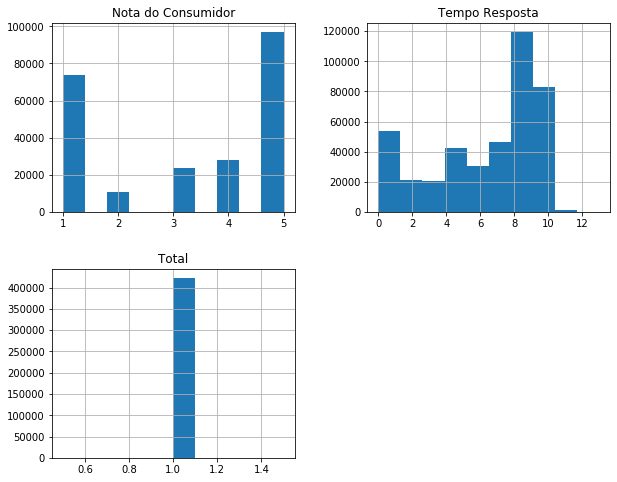

In [6]:
#ver histograma das variáveis numéricas
consumidor.hist(figsize = (10,8));

## Qual Região e Estado  possuem maiores números de reclamantes?

In [7]:
consumidor.groupby('Região')['Região'].count()

Região
CO     46799
N      14869
NE     75340
S      89456
SE    196927
Name: Região, dtype: int64

In [8]:
consumidor.groupby('UF')['UF'].count()

UF
AC      1212
AL      2819
AM      3634
AP       593
BA     21097
CE     12583
DF     18117
ES     10549
GO     12893
MA      9875
MG     36872
MS      7503
MT      8286
PA      5015
PB      5749
PE     13304
PI      4418
PR     41880
RJ     36482
RN      2983
RO      1849
RR       698
RS     31627
SC     15949
SE      2512
SP    113024
TO      1868
Name: UF, dtype: int64

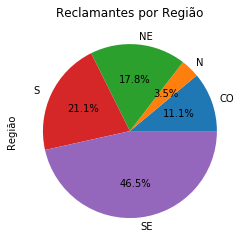

In [9]:
#Gerar gráfico pizza para melhor visualização
consumidor.groupby('Região')['Região'].count().plot(kind = 'pie', title = 'Reclamantes por Região'
                                                    , legend = False, autopct='%1.1f%%');

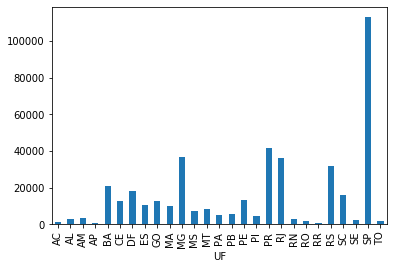

In [10]:
#Gráfico de barras para melhor visualização
consumidor.groupby('UF')['UF'].count().plot.bar();

O sudeste concentra o maior número de reclamantes. Isso se confirma ao ver a posição de São Paulo.

## Qual sexo possui mais reclamantes?

In [11]:
consumidor[u'Sexo'].value_counts()

M    244566
F    178825
Name: Sexo, dtype: int64

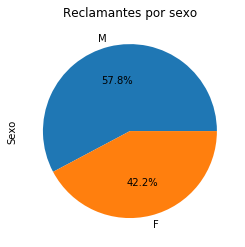

In [12]:
consumidor[u'Sexo'].value_counts().plot(kind = 'pie', title = 'Reclamantes por sexo', legend = False, autopct='%1.1f%%' );

## Qual a faixa etária dos reclamantes?

In [13]:
idade = consumidor[u'Faixa Etária'].value_counts()
print (idade)

entre 31 a 40 anos    136765
entre 21 a 30 anos    119413
entre 41 a 50 anos     69002
entre 51 a 60 anos     44027
entre 61 a 70 anos     30861
mais de 70 anos        13979
até 20 anos             9344
Name: Faixa Etária, dtype: int64


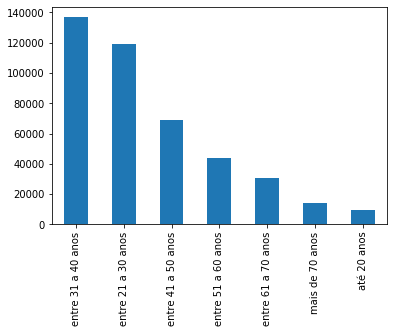

In [14]:
idade.plot.bar();

## Há distinção de velocidade de atendimento entre os sexos?

In [15]:
consumidor.groupby('Sexo')[u'Tempo Resposta'].value_counts()

Sexo  Tempo Resposta
F     10.0              34813
      8.0               26351
      9.0               25521
      7.0               20913
      6.0               13516
      1.0               10236
      0.0                9742
      5.0                9468
      4.0                8592
      2.0                8549
      3.0                8485
      11.0                590
      12.0                 10
M     10.0              47851
      9.0               33912
      8.0               33743
      7.0               25686
      0.0               18450
      6.0               16892
      1.0               15424
      5.0               12725
      2.0               12698
      3.0               11981
      4.0               11867
      11.0                983
      12.0                 14
      13.0                  4
Name: Tempo Resposta, dtype: int64

In [16]:
consumidor.groupby('Sexo')[u'Tempo Resposta'].describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
F,176786.0,6.545886,3.136405,0.0,4.0,7.0,9.0,12.0
M,242230.0,6.331606,3.308269,0.0,4.0,7.0,9.0,13.0


A média de dias esperados pelo sexo feminino é levemente superior à média de dias esperados pelo sexo masculino.

## Há distinção de velocidade de atendimento entre as regiões?

In [17]:
consumidor.groupby('Região')[u'Tempo Resposta'].describe()

,count,mean,std,min,25%,50%,75%,max
Região,,,,,,,,
CO,46016.0,6.581167,3.188152,0.0,4.0,8.0,9.0,13.0
N,14766.0,6.158608,3.390476,0.0,3.0,7.0,9.0,13.0
NE,74629.0,6.409358,3.245189,0.0,4.0,7.0,9.0,12.0
S,88604.0,6.537188,3.088108,0.0,4.0,7.0,9.0,13.0
SE,195001.0,6.356911,3.299044,0.0,4.0,7.0,9.0,13.0


Percebe-se que não há uma distinção gritante.

## Qual empresa foi mais reclamada?

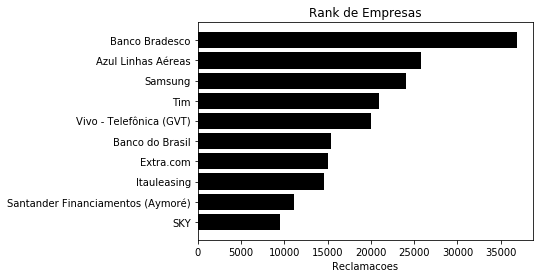

In [18]:
fig, ax = plt.subplots()

y_pos = np.arange(len(consumidor['Nome Fantasia'].value_counts()[:10]))
values = consumidor['Nome Fantasia'].value_counts()[:10]
segmentos = consumidor['Nome Fantasia'].unique()[:10]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

## Qual segmento do mercado, área e grupo de reclamação são mais frequentes?

In [19]:
# Descobrir o segmento de mercado mais frequente
consumidor[u'Segmento de Mercado'].value_counts()


Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    146839
Bancos, Financeiras e Administradoras de Cartão                            111728
Comércio Eletrônico                                                         33066
Bancos de Dados e Cadastros de Consumidores                                 27449
Transporte Aéreo                                                            24315
Empresas de Intermediação de Serviços / Negócios                            18298
Empresas de Pagamento Eletrônico                                            10882
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática        8388
Energia Elétrica                                                             6737
Programas de Fidelidade                                                      5841
Corretoras e Sociedades de Seguros, Capitalização e Previdência              4774
Empresas de Recuperação de Crédito                                           3980
Agências de Viag

In [20]:
#Descobrir a área mais frequente
consumidor[u'Área'].value_counts()

Serviços Financeiros                       161200
Telecomunicações                           128408
Produtos de Telefonia e Informática         34218
Transportes                                 24014
Demais Produtos                             23838
Demais Serviços                             18634
Produtos Eletrodomésticos e Eletrônicos     16760
Água, Energia, Gás                           8533
Saúde                                        3390
Turismo/Viagens                              2537
Alimentos                                    1453
Habitação                                     248
Educação                                      158
Name: Área, dtype: int64

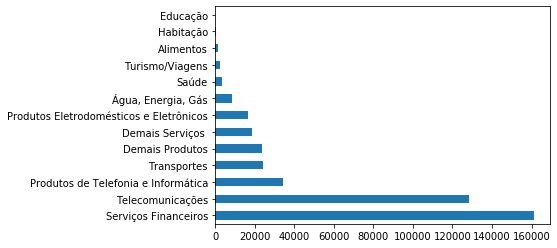

In [21]:
consumidor[u'Área'].value_counts().plot(kind = 'barh');

In [22]:
# Descobrir qual grupo de reclamação mais frequente
consumidor[u'Grupo Problema'].value_counts()


Cobrança / Contestação    188636
Contrato / Oferta          80506
Vício de Qualidade         55901
Atendimento / SAC          48619
Informação                 31784
Entrega do Produto         15877
Saúde e Segurança           2068
Name: Grupo Problema, dtype: int64

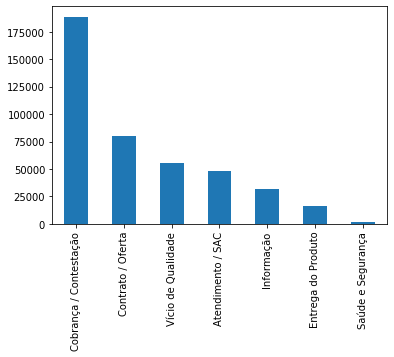

In [23]:
consumidor[u'Grupo Problema'].value_counts().plot(kind = 'bar');

## Como contratam os serviços?

In [24]:
consumidor[u'Como Comprou Contratou'].value_counts()

Internet                   156799
Loja física                 89122
Telefone                    84082
Não comprei / contratei     75831
Domicílio                   10072
SMS / Mensagem de texto      2098
Ganhei de presente           1949
Stand, feiras e eventos      1723
Catálogo                     1715
Name: Como Comprou Contratou, dtype: int64

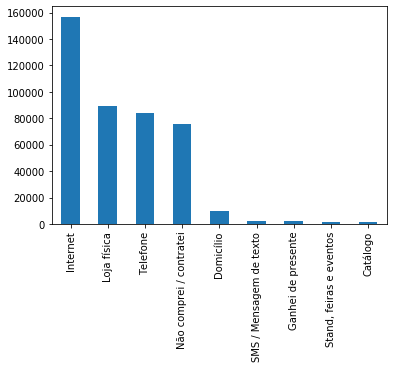

In [25]:
consumidor[u'Como Comprou Contratou'].value_counts().plot.bar();

## Os consumidores procuram a empresa para resolver o problema?

In [26]:
consumidor[u'Procurou Empresa'].value_counts()

S    321773
N    101618
Name: Procurou Empresa, dtype: int64

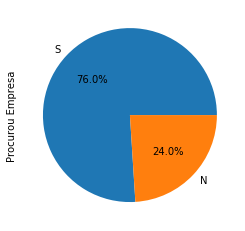

In [27]:
consumidor[u'Procurou Empresa'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' );

## As empresas costumam deixar os consumidores no vácuo?

In [28]:
consumidor[u'Respondida'].value_counts()

S    419016
N      4375
Name: Respondida, dtype: int64

É uma minoria que ficou sem resposta, mas ainda um número alto de pessoas sem resposta. 

In [29]:
nao_respondeu = consumidor[consumidor['Respondida'] == 'N']

In [30]:
#Achar as 5 empresas que menos respondem
nao_respondeu[u'Nome Fantasia'].value_counts()


Avianca - Oceanair (DESATIVADA)    970
Banco Safra                        764
Avianca - Voos internacionais      513
Dotz                               155
Aigle Azur                         136
                                  ... 
Single Care                          1
ImpressorAjato.com                   1
Lojas Becker                         1
Energisa Sergipe                     1
AOC                                  1
Name: Nome Fantasia, Length: 310, dtype: int64

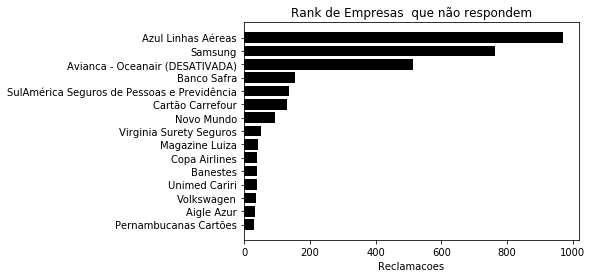

In [31]:
fig, ax = plt.subplots()

y_pos = np.arange(len(nao_respondeu['Nome Fantasia'].value_counts()[:15]))
values = nao_respondeu['Nome Fantasia'].value_counts()[:15]
segmentos = nao_respondeu['Nome Fantasia'].unique()[:15]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas  que não respondem')

plt.show()

## Correlação entre variáveis

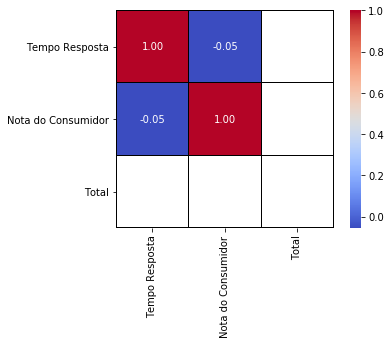

In [32]:
#plotar o heatmap para visualizar as correlações entre variáveis

sns.heatmap(consumidor.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='black', annot=True);

# 4. Preparação dos Dados

## Selecionar as features

In [33]:
#Eliminar as variáveis que não são tão importantes para a análise

consumidor.drop(['Data Finalização', 'Problema', 'Situação', 'Total'], axis = 1, inplace = True)

## Valores faltantes

In [34]:
consumidor.isnull().sum()

Região                         0
UF                             0
Cidade                         0
Sexo                           0
Faixa Etária                   0
Tempo Resposta              4375
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Avaliação Reclamação           0
Nota do Consumidor        190323
dtype: int64

Nota do consumidor faltam muitos dados. Apagá-los irá alterar a análise. <br> Tempo de resposta também. <br> Logo, é melhor substituir os valores pela mediana e pela média.

In [35]:
#Preencher os espaços vazios do Tempo de Resposta com a mediana
tempo_median = consumidor['Tempo Resposta'].median()
consumidor['Tempo Resposta'].fillna(tempo_median, inplace = True)

#Preencher os espaços vazios da Nota com a média
nota_mean = consumidor['Nota do Consumidor'].mean()
consumidor['Nota do Consumidor'].fillna(nota_mean, inplace = True)